In [1]:
# read hmeq_data.csv into a DataFrame called 'hmeq_data'
import pandas as pd
hmeq_data = pd.read_csv('C:/Users/molak/Desktop/dev/hmeq_data.csv')

In [2]:
hmeq_data.shape

(5960, 11)

In [3]:
hmeq_data.head

<bound method NDFrame.head of       BAD   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0       1   25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1       1   70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2       1   13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3       1       NaN       NaN   NaN    NaN     NaN         NaN   NaN   NaN   
4       0   97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   
5       1   30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   8.0   
6       1   48649.0   57037.0   5.0    3.0     2.0   77.100000   1.0  17.0   
7       1   28502.0   43034.0  11.0    0.0     0.0   88.766030   0.0   8.0   
8       1   32700.0   46740.0   3.0    0.0     2.0  216.933333   1.0  12.0   
9       1       NaN   62250.0  16.0    0.0     0.0  115.800000   0.0  13.0   
10      1   22608.0       NaN  18.0    NaN     NaN         NaN   NaN   NaN   
11      1   20627.0   29800.0  11.

In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hmeq_data

,BAD,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN
0,1,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1100
1,1,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1300
2,1,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,1500
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500
4,0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,1700
5,1,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1700
6,1,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,NaN,1800
7,1,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,1800
8,1,32700.0,46740.0,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,2000
9,1,NaN,62250.0,16.0,0.0,0.0,115.800000,0.0,13.0,NaN,2000


In [6]:
# setting x and y variables
X = hmeq_data.iloc[:, :-1].values
y = hmeq_data.iloc[:, 10].values

In [6]:
X

array([[1.00000000e+00, 2.58600000e+04, 3.90250000e+04, ...,
        1.00000000e+00, 9.00000000e+00,            nan],
       [1.00000000e+00, 7.00530000e+04, 6.84000000e+04, ...,
        0.00000000e+00, 1.40000000e+01,            nan],
       [1.00000000e+00, 1.35000000e+04, 1.67000000e+04, ...,
        1.00000000e+00, 1.00000000e+01,            nan],
       ...,
       [0.00000000e+00, 5.40450000e+04, 9.29240000e+04, ...,
        0.00000000e+00, 1.50000000e+01, 3.55565905e+01],
       [0.00000000e+00, 5.03700000e+04, 9.18610000e+04, ...,
        0.00000000e+00, 1.60000000e+01, 3.43408824e+01],
       [0.00000000e+00, 4.88110000e+04, 8.89340000e+04, ...,
        0.00000000e+00, 1.60000000e+01, 3.45715191e+01]])

In [7]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:10])
X[:, 1:10] = imputer.transform(X[:, 1:10])

In [8]:
X

array([[1.00000000e+00, 2.58600000e+04, 3.90250000e+04, ...,
        1.00000000e+00, 9.00000000e+00, 3.37799153e+01],
       [1.00000000e+00, 7.00530000e+04, 6.84000000e+04, ...,
        0.00000000e+00, 1.40000000e+01, 3.37799153e+01],
       [1.00000000e+00, 1.35000000e+04, 1.67000000e+04, ...,
        1.00000000e+00, 1.00000000e+01, 3.37799153e+01],
       ...,
       [0.00000000e+00, 5.40450000e+04, 9.29240000e+04, ...,
        0.00000000e+00, 1.50000000e+01, 3.55565905e+01],
       [0.00000000e+00, 5.03700000e+04, 9.18610000e+04, ...,
        0.00000000e+00, 1.60000000e+01, 3.43408824e+01],
       [0.00000000e+00, 4.88110000e+04, 8.89340000e+04, ...,
        0.00000000e+00, 1.60000000e+01, 3.45715191e+01]])

In [9]:
hmeq_data.head

<bound method NDFrame.head of       BAD   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0       1   25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1       1   70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2       1   13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3       1       NaN       NaN   NaN    NaN     NaN         NaN   NaN   NaN   
4       0   97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   
5       1   30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   8.0   
6       1   48649.0   57037.0   5.0    3.0     2.0   77.100000   1.0  17.0   
7       1   28502.0   43034.0  11.0    0.0     0.0   88.766030   0.0   8.0   
8       1   32700.0   46740.0   3.0    0.0     2.0  216.933333   1.0  12.0   
9       1       NaN   62250.0  16.0    0.0     0.0  115.800000   0.0  13.0   
10      1   22608.0       NaN  18.0    NaN     NaN         NaN   NaN   NaN   
11      1   20627.0   29800.0  11.

In [10]:
hmeq_data.fillna(hmeq_data.mean())

,BAD,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN
0,1,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,1100
1,1,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,1300
2,1,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,1500
3,1,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,1500
4,0,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,1700
5,1,30548.0000,40320.000000,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614,1700
6,1,48649.0000,57037.000000,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915,1800
7,1,28502.0000,43034.000000,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894,1800
8,1,32700.0000,46740.000000,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915,2000
9,1,73760.8172,62250.000000,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915,2000


In [11]:
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
#fitting Multiple linearRegression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#predicting the Test set result
y_prep = regressor.predict(X_test)

In [14]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((5960, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     92.85
Date:                Thu, 31 May 2018   Prob (F-statistic):          4.76e-179
Time:                        09:48:51   Log-Likelihood:                -63597.
No. Observations:                5960   AIC:                         1.272e+05
Df Residuals:                    5949   BIC:                         1.273e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8566.4219    727.410     11.777      0.000    7140.435    9992.409
x1         -2284.6798    380.109     -6.011      0.000   -3029.832   -1539.528
x2            -0.0253      0.005     -4.836      0.000      -0.036      -0.015
x3             0.0794      0.004     20.636      0.000       0.072       0.087
x4           141.3188     19.299      7.323      0.000     103.486     179.151
x5           486.7705    179.430      2.713      0.007     135.023     838.518
x6          -129.2134    137.526     -0.940      0.347    -398.814     140.388
x7             2.4923      1.740      1.432      0.152      -0.919       5.903
x8           417.0834     84.606      4.930      0.000     251.226     582.941
x9           -29.0134     15.017     -1.932      0.053     -58.453       0.426
x10           77.8197     18.270      4.259      0.000      42.004     113.636
==============================================================================
Omnibus:                     2787.488   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20096.325
Skew:                           2.113   Prob(JB):                         0.00
Kurtosis:                      10.941   Cond. No.                     7.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# eliminating the independant variable with the higher p value
X = np.append(arr = np.ones((5960, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5,7,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 29 May 2018   Prob (F-statistic):          8.48e-176
Time:                        01:04:21   Log-Likelihood:                -63610.
No. Observations:                5960   AIC:                         1.272e+05
Df Residuals:                    5951   BIC:                         1.273e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5506.5260    233.700     23.562      0.000    5048.389    5964.663
x1          5506.5260    233.700     23.562      0.000    5048.389    5964.663
x2         -1913.4313    371.371     -5.152      0.000   -2641.454   -1185.409
x3            -0.0249      0.005     -4.761      0.000      -0.035      -0.015
x4             0.0798      0.004     20.713      0.000       0.072       0.087
x5           137.0868     19.311      7.099      0.000      99.231     174.943
x6          -111.7004    137.055     -0.815      0.415    -380.378     156.977
x7             1.9623      1.740      1.128      0.259      -1.449       5.373
x8           466.8749     84.049      5.555      0.000     302.108     631.641
x9           -18.2832     14.886     -1.228      0.219     -47.466      10.899
==============================================================================
Omnibus:                     2784.605   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20016.614
Skew:                           2.111   Prob(JB):                         0.00
Kurtosis:                      10.923   Cond. No.                     5.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
X = np.append(arr = np.ones((5960, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5,8,9,10]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     140.3
Date:                Tue, 29 May 2018   Prob (F-statistic):          8.02e-167
Time:                        01:06:26   Log-Likelihood:                -63635.
No. Observations:                5960   AIC:                         1.273e+05
Df Residuals:                    5953   BIC:                         1.273e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3930.7877    139.205     28.237      0.000    3657.895    4203.680
x1          3930.7877    139.205     28.237      0.000    3657.895    4203.680
x2          3930.7877    139.205     28.237      0.000    3657.895    4203.680
x3         -2014.9408    372.399     -5.411      0.000   -2744.978   -1284.904
x4            -0.0312      0.005     -6.090      0.000      -0.041      -0.021
x5             0.0823      0.004     21.392      0.000       0.075       0.090
x6           -89.4141    135.650     -0.659      0.510    -355.338     176.510
x7             3.7019      1.685      2.196      0.028       0.398       7.006
x8           434.8027     83.913      5.182      0.000     270.303     599.303
==============================================================================
Omnibus:                     2842.609   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21298.823
Skew:                           2.150   Prob(JB):                         0.00
Kurtosis:                      11.202   Cond. No.                     5.98e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.39e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
X = np.append(arr = np.ones((5960, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5,9,10]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     84.39
Date:                Tue, 29 May 2018   Prob (F-statistic):           8.04e-70
Time:                        01:07:27   Log-Likelihood:                -63865.
No. Observations:                5960   AIC:                         1.277e+05
Df Residuals:                    5955   BIC:                         1.278e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3425.0625    103.593     33.063      0.000    3221.982    3628.143
x1          3425.0625    103.593     33.063      0.000    3221.982    3628.143
x2          3425.0625    103.593     33.063      0.000    3221.982    3628.143
x3          3425.0625    103.593     33.063      0.000    3221.982    3628.143
x4         -1432.9757    382.752     -3.744      0.000   -2183.309    -682.643
x5             0.0546      0.003     16.271      0.000       0.048       0.061
x6          -181.6331    140.858     -1.289      0.197    -457.766      94.500
x7             6.9412      1.734      4.003      0.000       3.542      10.340
==============================================================================
Omnibus:                     2887.598   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21517.771
Skew:                           2.196   Prob(JB):                         0.00
Kurtosis:                      11.208   Cond. No.                     7.46e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.77e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

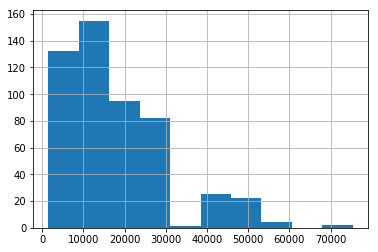

In [46]:
hmeq_data[hmeq_data.MORTDUE.isnull()].LOAN.hist()

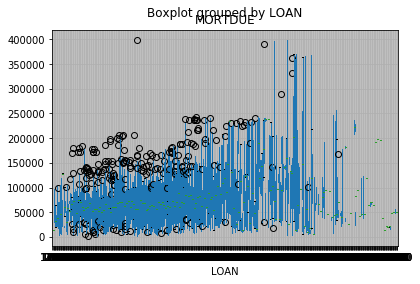

In [34]:
# Box plot
hmeq_data.boxplot(column='MORTDUE', by='LOAN');

In [ ]:
# Based on the analysis the independents variables indexes are(based on x data):1,2,3,7 and 8